# 0. Imports

In [1]:
%pip install scikeras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import PredefinedSplit
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV


import warnings
# Ignore specific UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

# 1. Load Data

In [2]:
train, test = datasets.cifar10.load_data()

In [3]:
train_images, train_labels = train
test_images, test_labels = test
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

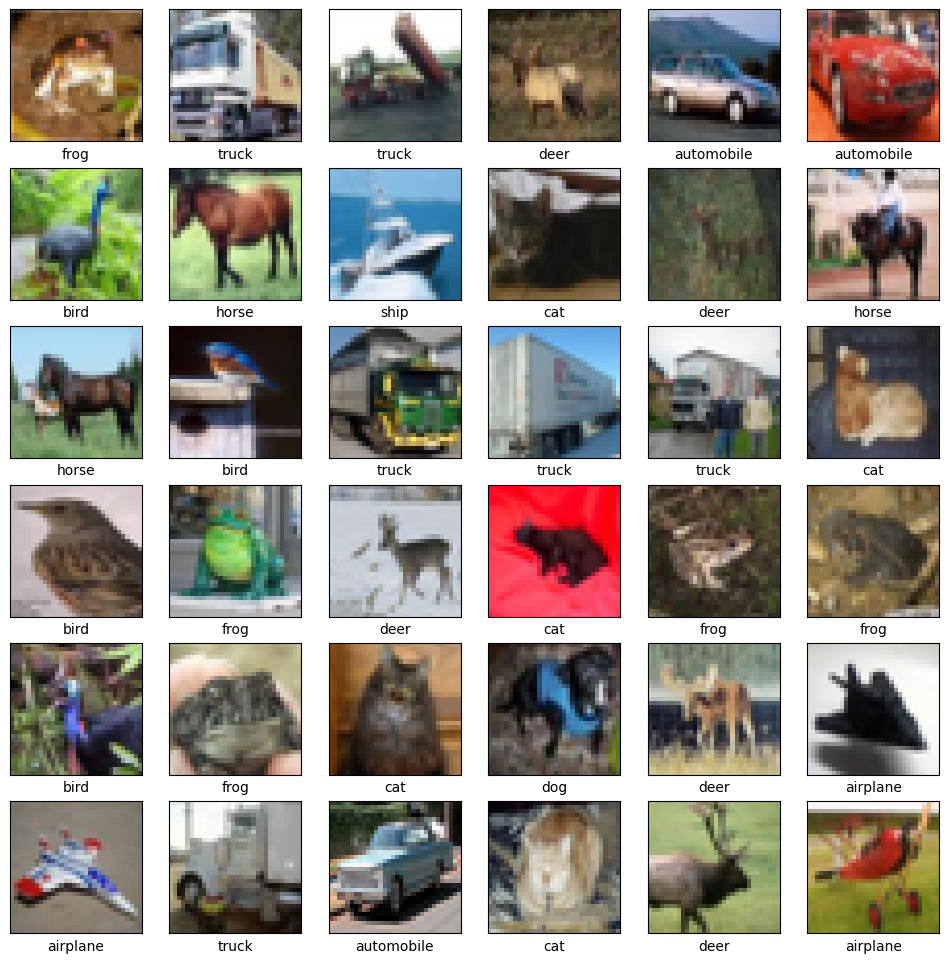

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

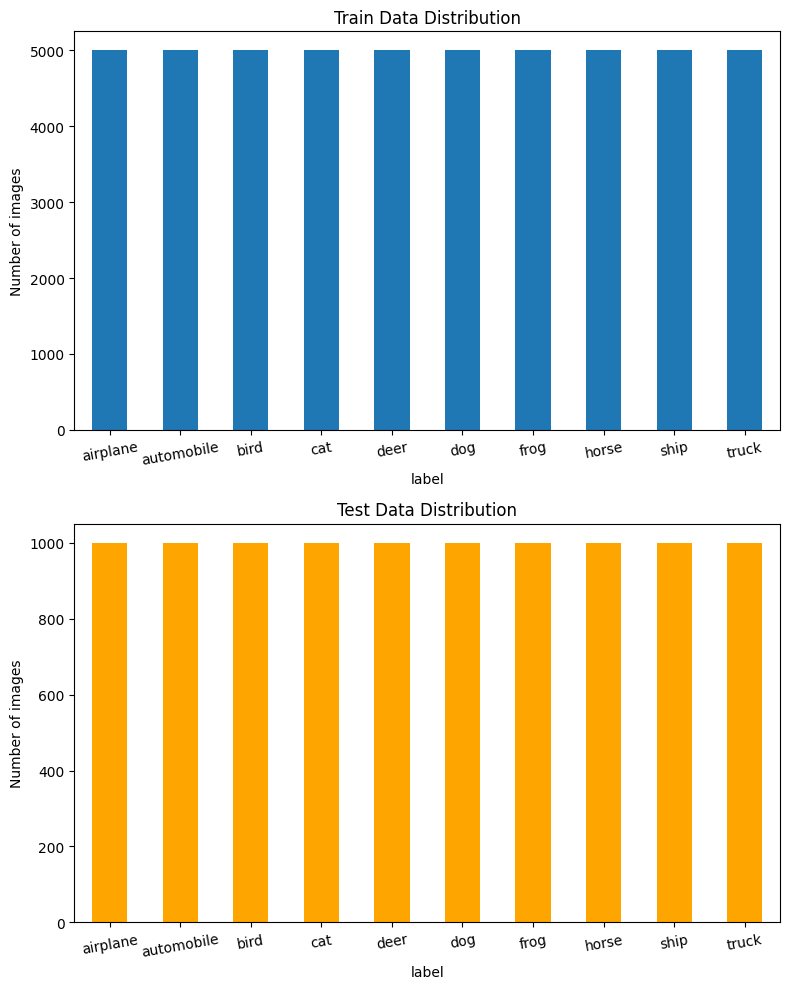

In [7]:
df_train = pd.DataFrame(train_labels, columns=['label'])
df_test = pd.DataFrame(test_labels, columns=['label'])
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot train data distribution
df_train['label'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xticks(range(len(class_names)))
axes[0].set_xticklabels(class_names, rotation=10)
axes[0].set_ylabel('Number of images')
axes[0].set_title('Train Data Distribution')

# Plot test data distribution
df_test['label'].value_counts().sort_index().plot(kind='bar', color='orange', ax=axes[1])
axes[1].set_xticks(range(len(class_names)))
axes[1].set_xticklabels(class_names, rotation=10)
axes[1].set_ylabel('Number of images')
axes[1].set_title('Test Data Distribution')

plt.tight_layout()
plt.show()

# 2. Split and Preprocess Data

In [4]:
validation_size = 0.4 #40% of thetest data will be used for validation

val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=validation_size, random_state=42)
print('Train images:', train_images.shape)
print('Train labels:', train_labels.shape)
print('Validation images:', val_images.shape)
print('Validation labels:', val_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)


Train images: (50000, 32, 32, 3)
Train labels: (50000, 1)
Validation images: (6000, 32, 32, 3)
Validation labels: (6000, 1)
Test images: (4000, 32, 32, 3)
Test labels: (4000, 1)


In [5]:
# Scaling by 255
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# 3. Train Model

In [6]:
def display_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xticks(rotation=25)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid(False)
    plt.show()

def display_classification_report(y_test, y_pred):
    print('Classification Report')
    print(classification_report(y_test, y_pred, target_names=class_names))

def display_metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    prec = precision_score(y_test, y_pred, average='weighted')
    print('Precision:', prec)
    rec = recall_score(y_test, y_pred, average='weighted')
    print('Recall:', rec)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('F1 score:', f1)

    return acc, prec, rec, f1

## 3.1. Simple CNN

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3),),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_cnn = cnn.fit(train_images, train_labels, epochs=100, validation_data=(val_images, val_labels), callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3585 - loss: 1.7374 - val_accuracy: 0.5845 - val_loss: 1.1500
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6133 - loss: 1.0977 - val_accuracy: 0.6363 - val_loss: 1.0219
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6801 - loss: 0.9131 - val_accuracy: 0.6793 - val_loss: 0.9257
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7230 - loss: 0.7879 - val_accuracy: 0.6887 - val_loss: 0.8882
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7615 - loss: 0.6842 - val_accuracy: 0.7272 - val_loss: 0.8039
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7889 - loss: 0.6012 - val_accuracy: 0.7328 - val_loss: 0.8039
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8140 - loss: 0.5297 - val_accuracy: 0.7343 - val_loss: 0.8417
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8366 - loss: 0.463

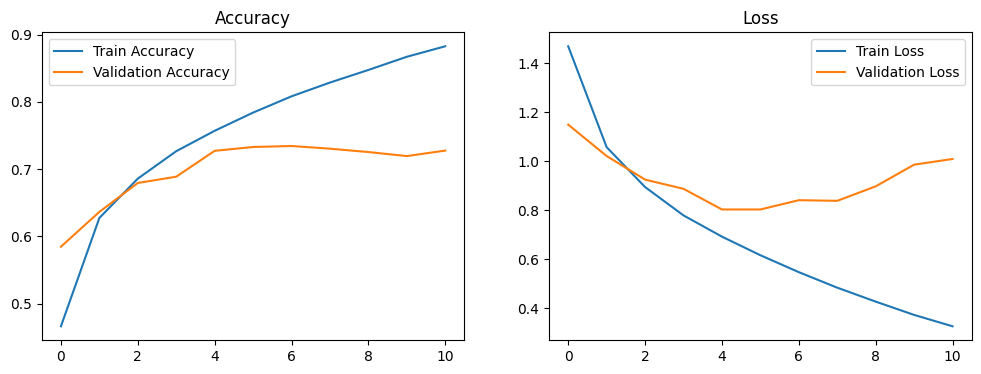

In [ ]:
display_history(history_cnn)

In [ ]:
# Save the model to a file
cnn.save('cnn_model.keras')

In [2]:
# Load the model from the file
cnn = tf.keras.models.load_model('cnn_model.keras')

In [4]:
cnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,460,384 (5.57 MB)

 Trainable params: 486,794 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 973,590 (3.71 MB)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report
              precision    recall  f1-score   support

    airplane       0.73      0.85      0.79       620
  automobile       0.86      0.82      0.84       620
        bird       0.62      0.65      0.63       569
         cat       0.56      0.51      0.54       613
        deer       0.70      0.71      0.71       600
         dog       0.59      0.68      0.63       612
        frog       0.79      0.79      0.79       590
       horse       0.83      0.69      0.75       562
        ship       0.86      0.79      0.82       609
       truck       0.82      0.82      0.82       605

    accuracy                           0.73      6000
   macro avg       0.74      0.73      0.73      6000
weighted avg       0.74      0.73      0.73      6000



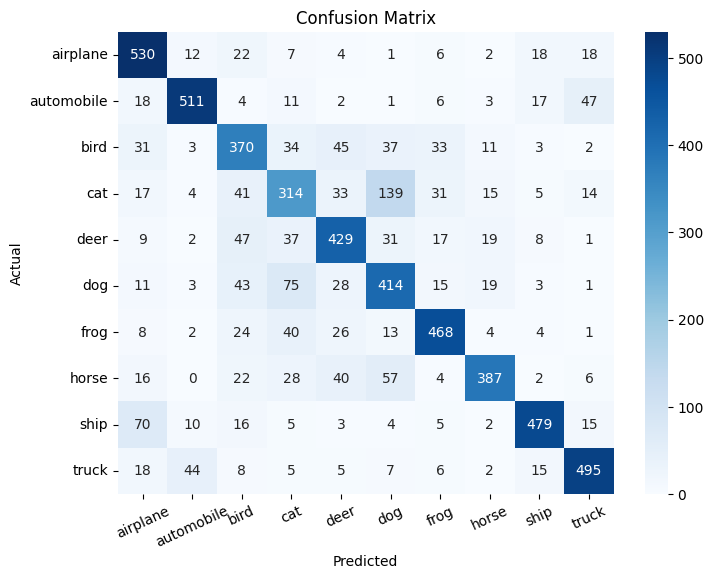

Accuracy: 0.7328333333333333
Precision: 0.7377239908600759
Recall: 0.7328333333333333
F1 score: 0.7333726979452502


In [ ]:
y_pred_cnn = np.argmax(cnn.predict(val_images), axis=1)
display_classification_report(val_labels, y_pred_cnn)
display_confusion_matrix(val_labels, y_pred_cnn)
acc_cnn, prec_cnn, rec_cnn, f1_cnn = display_metrics(val_labels, y_pred_cnn)

## 3.2. ResNet18

In [7]:
@tf.keras.utils.register_keras_serializable()
class ResNetBlock(tf.keras.Model):
    def __init__(self, filters, kernel_size=(3, 3), downsample=False, **kwargs):
        super(ResNetBlock, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.downsample_flag = downsample

        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.add = tf.keras.layers.Add()
        self.relu = tf.keras.layers.ReLU()
        self.downsample = lambda x : x

        if downsample:
            self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same', strides=(2, 2))
            self.downsample = tf.keras.Sequential()
            self.downsample.add(tf.keras.layers.Conv2D(filters, (1, 1), strides=(2, 2)))
            self.downsample.add(tf.keras.layers.BatchNormalization())

    def call(self, input_tensor):
        x = self.conv1(input_tensor)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        shortcut = self.downsample(input_tensor)
        x = self.add([x, shortcut])
        x = self.relu(x)
        return x

    def get_config(self):
        config = super(ResNetBlock, self).get_config()
        config.update({
            'filters': self.filters,
            'kernel_size': self.kernel_size,
            'downsample': self.downsample_flag
        })
        return config

In [ ]:
resnet18 = models.Sequential([
    layers.Conv2D(64, (7, 7), padding='same', strides=(2, 2), input_shape=train_images[0].shape), # Layer 1
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
    ResNetBlock(64), # Layer 2 & 3
    ResNetBlock(64), # Layer 4 & 5
    layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
    ResNetBlock(128, downsample=True), # Layer 6 & 7
    ResNetBlock(128), # Layer 8 & 9
    layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
    ResNetBlock(256, downsample=True), # Layer 10 & 11
    ResNetBlock(256), # Layer 12 & 13
    layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
    ResNetBlock(512, downsample=True), # Layer 14 & 15
    ResNetBlock(512), # Layer 16 & 17
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax') # Layer 18
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'res_net_block_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt 

In [ ]:
resnet18.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_18 = resnet18.fit(train_images, train_labels, epochs=50, validation_data=(val_images, val_labels), callbacks=[early_stopping])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 23ms/step - accuracy: 0.3895 - loss: 1.7946 - val_accuracy: 0.4723 - val_loss: 1.5684
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5892 - loss: 1.1778 - val_accuracy: 0.5055 - val_loss: 1.8270
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6615 - loss: 0.9752 - val_accuracy: 0.5278 - val_loss: 1.5454
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7003 - loss: 0.8786 - val_accuracy: 0.6293 - val_loss: 1.0634
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7323 - loss: 0.7861 - val_accuracy: 0.6625 - val_loss: 1.0629
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7484 - loss: 0.7332 - val_accuracy: 0.6598 - val_loss: 1.0103
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7804 - loss: 0.6341 - val_accuracy: 0.5510 - val_loss: 1.5419
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8033 -

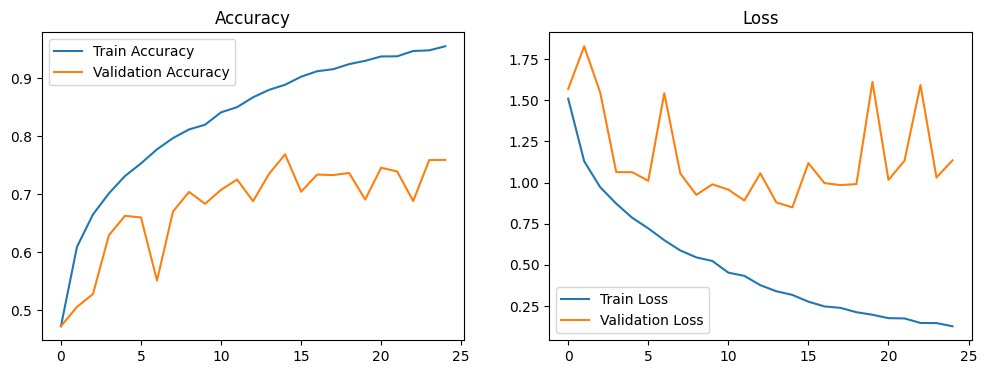

In [ ]:
display_history(history_18)

In [ ]:
# Save the model to a file
resnet18.save('resnet18_model.keras')

In [9]:
# Load the model from the file
resnet18 = tf.keras.models.load_model('resnet18_model.keras', custom_objects={'ResNetBlock': ResNetBlock})

In [10]:
y_pred_18 = np.argmax(resnet18.predict(val_images), axis=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step


Classification Report
              precision    recall  f1-score   support

    airplane       0.81      0.79      0.80       620
  automobile       0.81      0.92      0.86       620
        bird       0.63      0.76      0.69       569
         cat       0.69      0.53      0.60       613
        deer       0.71      0.78      0.74       600
         dog       0.68      0.71      0.70       612
        frog       0.75      0.87      0.81       590
       horse       0.90      0.72      0.80       562
        ship       0.87      0.89      0.88       609
       truck       0.91      0.73      0.81       605

    accuracy                           0.77      6000
   macro avg       0.78      0.77      0.77      6000
weighted avg       0.78      0.77      0.77      6000



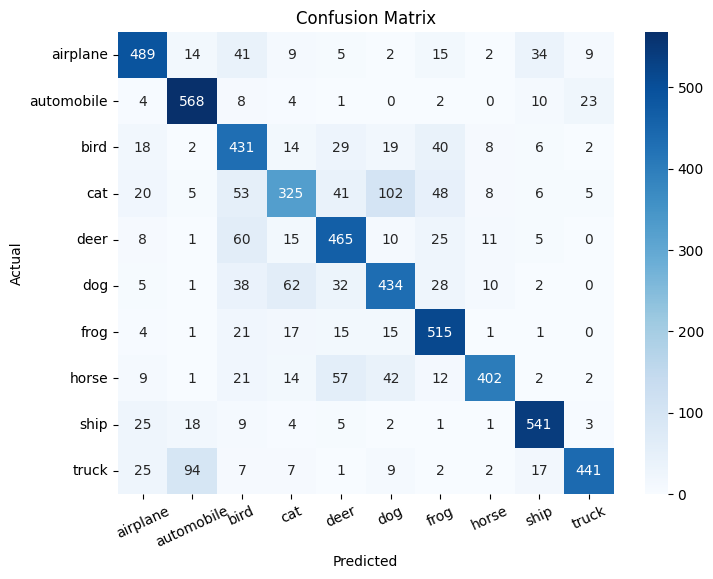

Accuracy: 0.7685
Precision: 0.7753675687049987
Recall: 0.7685
F1 score: 0.767237846394127


In [11]:
display_classification_report(val_labels, y_pred_18)
display_confusion_matrix(val_labels, y_pred_18)
acc_18, prec_18, rec_18, f1_18 = display_metrics(val_labels, y_pred_18)

## 3.3. AlexNet

In [ ]:
alexnet = models.Sequential([
    layers.Conv2D(96, (11, 11), strides=(4, 4), input_shape=train_images[0].shape),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
    layers.Conv2D(256, (5, 5), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
    layers.Conv2D(384, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(384, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
alexnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_alexnet = alexnet.fit(train_images, train_labels, epochs=50, validation_data=(val_images, val_labels), callbacks=[early_stopping])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.2224 - loss: 2.0346 - val_accuracy: 0.1950 - val_loss: 2.5154
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.4256 - loss: 1.5179 - val_accuracy: 0.3652 - val_loss: 1.8301
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5161 - loss: 1.3188 - val_accuracy: 0.5437 - val_loss: 1.3348
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5827 - loss: 1.1676 - val_accuracy: 0.5528 - val_loss: 1.2786
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6272 - loss: 1.0570 - val_accuracy: 0.5962 - val_loss: 1.1481
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6640 - loss: 0.9588 - val_accuracy: 0.6263 - val_loss: 1.0558
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6952 - loss: 0.8771 - val_accuracy: 0.5890 - val_loss: 1.2062
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7222 - loss: 

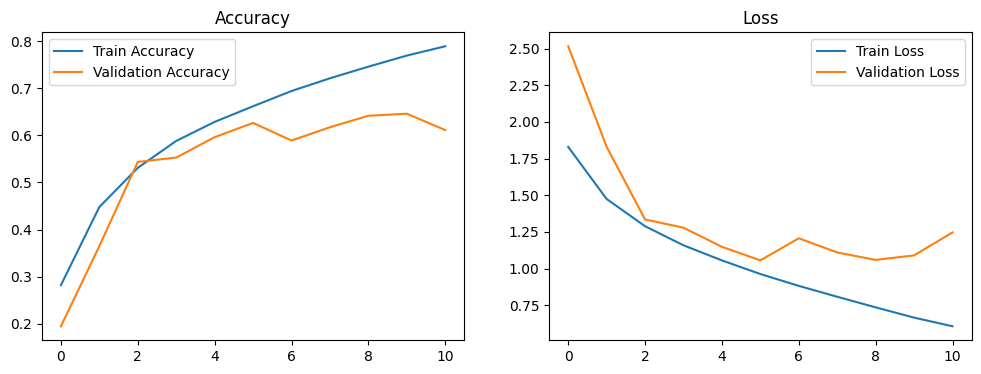

In [ ]:
display_history(history_alexnet)

In [ ]:
alexnet.save('alexnet_model.keras')

In [ ]:
alexnet = tf.keras.models.load_model('alexnet_model.keras')

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report
              precision    recall  f1-score   support

    airplane       0.75      0.61      0.68       620
  automobile       0.71      0.76      0.74       620
        bird       0.61      0.42      0.50       569
         cat       0.38      0.60      0.46       613
        deer       0.61      0.61      0.61       600
         dog       0.59      0.30      0.40       612
        frog       0.71      0.78      0.74       590
       horse       0.80      0.58      0.67       562
        ship       0.64      0.88      0.74       609
       truck       0.65      0.70      0.68       605

    accuracy                           0.63      6000
   macro avg       0.64      0.63      0.62      6000
weighted avg       0.64      0.63      0.62      6000



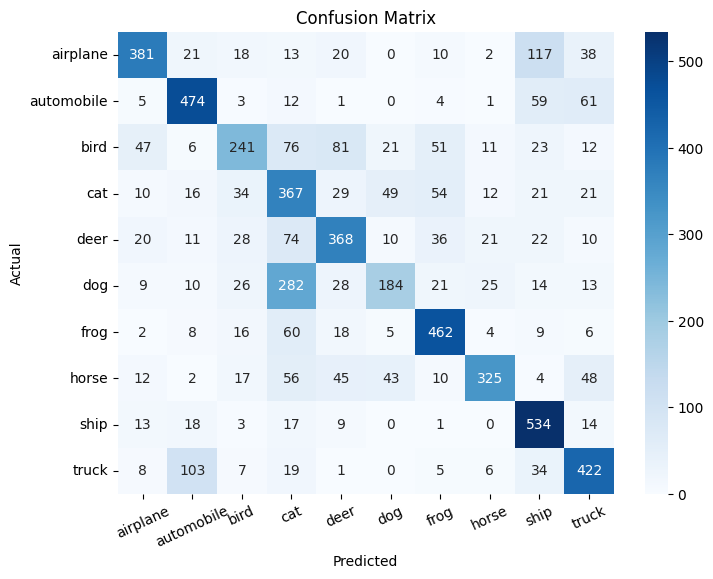

Accuracy: 0.6263333333333333
Precision: 0.6439136927030726
Recall: 0.6263333333333333
F1 score: 0.6214483233284309


In [ ]:
y_pred_alexnet = np.argmax(alexnet.predict(val_images), axis=1)
display_classification_report(val_labels, y_pred_alexnet)
display_confusion_matrix(val_labels, y_pred_alexnet)
acc_alexnet, prec_alexnet, rec_alexnet, f1_alexnet = display_metrics(val_labels, y_pred_alexnet)

# 4. Compare Models

In [ ]:
df_compare = pd.DataFrame({
    'Model': ['ResNet18', 'CNN', 'AlexNet'],
    'Accuracy': [acc_18, acc_cnn, acc_alexnet],
    'Precision': [prec_18, prec_cnn, prec_alexnet],
    'Recall': [rec_18, rec_cnn, rec_alexnet],
    'F1': [f1_18, f1_cnn, f1_alexnet]
})

display(df_compare)

,Model,Accuracy,Precision,Recall,F1
0,ResNet18,0.768500,0.775368,0.768500,0.767238
1,CNN,0.732833,0.737724,0.732833,0.733373
2,AlexNet,0.626333,0.643914,0.626333,0.621448


# 5. Gridsearch

In [13]:
@tf.keras.utils.register_keras_serializable()
class ResNetBlockTunable(ResNetBlock):
    def __init__(self, filters, kernel_size=(3, 3), downsample=False, regularization=None,
                 use_residual=None, **kwargs):
        super(ResNetBlockTunable, self).__init__(filters, kernel_size, downsample, **kwargs)
        self.regularization = regularization
        self.use_residual = use_residual

        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same',
                                            kernel_regularizer=regularization)
        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same',
                                            kernel_regularizer=regularization)
        if downsample:
          self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same', strides=(2, 2),
                                                kernel_regularizer=regularization)

    def call(self, input_tensor):
        x = self.conv1(input_tensor)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        if self.use_residual:
          shortcut = self.downsample(input_tensor)
          x = self.add([x, shortcut])
        x = self.relu(x)

        return x

    def get_config(self):
        config = super(ResNetBlockTunable, self).get_config()
        config.update({
            'filters': self.filters,
            'kernel_size': self.kernel_size,
            'downsample': self.downsample_flag,
            'regularization': self.regularization,
            'use_residual': self.use_residual
        })
        return config

In [12]:
def create_model(learning_rate=0.001, regularization=None, use_residual=True, dropout=None):
    model = models.Sequential(
        [
            layers.InputLayer(shape=train_images[0].flatten().shape),
            # Reshape layer to convert back to image format
            layers.Reshape(train_images[0].shape),
            layers.Conv2D(64, (7, 7), padding='same', strides=(2, 2)),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
            ResNetBlockTunable(64, regularization=regularization, use_residual=use_residual),
            ResNetBlockTunable(64, regularization=regularization, use_residual=use_residual),
            layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
            ResNetBlockTunable(128, downsample=True, regularization=regularization, use_residual=use_residual),
            ResNetBlockTunable(128, regularization=regularization, use_residual=use_residual),
            layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
            ResNetBlockTunable(256, downsample=True, regularization=regularization, use_residual=use_residual),
            ResNetBlockTunable(256, regularization=regularization, use_residual=use_residual),
            layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
            ResNetBlockTunable(512, downsample=True, regularization=regularization, use_residual=use_residual),
            ResNetBlockTunable(512, regularization=regularization, use_residual=use_residual),
            layers.GlobalAveragePooling2D()
        ]
    )
    if dropout is not None:
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Combine training and validation data

image_combined = np.concatenate((train_images, val_images), axis=0)
labels_combined = np.concatenate((train_labels, val_labels), axis=0)
image_combined_flat = image_combined.reshape(image_combined.shape[0], -1)
# Create the test_fold array for PredefinedSplit
test_fold = np.concatenate((
    -1 * np.ones(len(train_images)),  # -1 for training samples
    np.zeros(len(val_images))         # 0 for validation samples
))

# Create PredefinedSplit object
ps = PredefinedSplit(test_fold)

In [ ]:
param_grid = {
    'model__regularization': [None, tf.keras.regularizers.l2(0.01)],
    'model__use_residual': [True, False],
    'model__dropout': [None, 0.5]
}
early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=5, restore_best_weights=True)
model = KerasClassifier(build_fn=create_model, callbacks=[early_stopping], validation_split=0.1, metrics=['accuracy'])
gridsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=ps, verbose=1)


In [ ]:
# Perform the grid search with early stopping
# Define fit parameters
fit_params = {
    'epochs': 30,
    'batch_size': 32
}

gridsearch.fit(X=image_combined_flat, y=labels_combined, **fit_params)

Fitting 1 folds for each of 8 candidates, totalling 8 fits
Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 24ms/step - accuracy: 0.3901 - loss: 1.8118 - val_accuracy: 0.4314 - val_loss: 1.6800
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.5883 - loss: 1.1819 - val_accuracy: 0.5916 - val_loss: 1.2188
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.6567 - loss: 0.9870 - val_accuracy: 0.6132 - val_loss: 1.1172
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.6951 - loss: 0.8808 - val_accuracy: 0.5568 - val_loss: 1.3193
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.7231 - loss: 0.8014 - val_accuracy: 0.6398 - val_loss: 1.0693
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7565 - loss: 0.7081 - val_accuracy: 0.6248 - val_loss: 1.1535
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.7741 - loss: 0.6629 - val_accuracy: 0.7212 - val_loss: 0.8247
Epoch 8/30
1407/1

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KerasClassifier(build_fn=<function create_model at 0x7814dc154160>, callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7814dc0f7d00>], metrics=['accuracy'], validation_split=0.1),
             param_grid={'model__dropout': [None, 0.5],
                         'model__regularization': [None,
                                                   <keras.src.regularizers.regularizers.L2 object at 0x7814dc0f7a30>],
                         'model__use_residual': [True, False]},
             verbose=1)

In [ ]:
best_params = gridsearch.best_params_

print('Best parameters:', best_params)

Best parameters: {'model__dropout': None, 'model__regularization': None, 'model__use_residual': True}


## 5.1. Find Best Learning Rate

In [10]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 19ms/step - accuracy: 0.4019 - loss: 1.7661 - val_accuracy: 0.4628 - val_loss: 1.6262
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6003 - loss: 1.1573 - val_accuracy: 0.5297 - val_loss: 1.4663
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6588 - loss: 0.9763 - val_accuracy: 0.5577 - val_loss: 1.3290
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6981 - loss: 0.8847 - val_accuracy: 0.6182 - val_loss: 1.0702
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7317 - loss: 0.7806 - val_accuracy: 0.6808 - val_loss: 0.9340
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7614 - loss: 0.6923 - val_accuracy: 0.6797 - val_loss: 1.0044
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7812 - loss: 0.6391 - val_accuracy: 0.5503 - val_loss: 1.5828
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7902 -

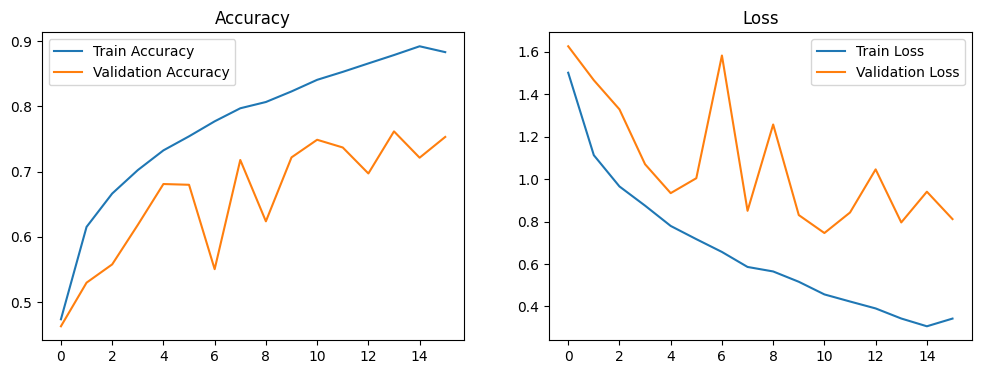

In [25]:
learning_rates = [0.001, 0.0001, 0.01]

best_accuracy = 0
best_history = None
for lr in learning_rates:
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True)
    model = create_model(learning_rate=lr, regularization=best_params['model__regularization'],
                         use_residual=best_params['model__use_residual'], dropout=best_params['model__dropout'])
    history_lr = model.fit(train_images_flat, train_labels, epochs=30, batch_size=32, validation_data=(val_images_flat, val_labels), callbacks=[early_stopping])
    y_pred_lr = np.argmax(model.predict(val_images_flat), axis=1)
    accuracy = accuracy_score(val_labels, y_pred_lr)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_lr = lr
        best_history = history_lr
print('Best learning rate:', best_lr)
print('Accuracy:', best_accuracy)
display_history(best_history)

At the end the best learning rate is found to be 0.001, which is the default learning rate for Adam optimizer.

## 5.2. Try Data Augmentation

In [ ]:
# Data Augmentation on the training data
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Create a new model with data augmentation
def create_model_with_aug(learning_rate=0.001, regularization=None, use_residual=True, dropout=None):
    model = models.Sequential(
        [
            layers.InputLayer(shape=train_images[0].flatten().shape),
            # Reshape layer to convert back to image format
            layers.Reshape(train_images[0].shape),
            data_augmentation,
            layers.Conv2D(64, (7, 7), padding='same', strides=(2, 2)),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
            ResNetBlockTunable(64, regularization=regularization, use_residual=use_residual),
            ResNetBlockTunable(64, regularization=regularization, use_residual=use_residual),
            layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
            ResNetBlockTunable(128, downsample=True, regularization=regularization, use_residual=use_residual),
            ResNetBlockTunable(128, regularization=regularization, use_residual=use_residual),
            layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
            ResNetBlockTunable(256, downsample=True, regularization=regularization, use_residual=use_residual),
            ResNetBlockTunable(256, regularization=regularization, use_residual=use_residual),
            layers.MaxPooling2D((3, 3), padding='same', strides=(2, 2)),
            ResNetBlockTunable(512, downsample=True, regularization=regularization, use_residual=use_residual),
            ResNetBlockTunable(512, regularization=regularization, use_residual=use_residual),
            layers.GlobalAveragePooling2D()
        ]
    )
    if dropout is not None:
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [30]:
model_aug = create_model_with_aug(learning_rate=best_lr, regularization=best_params['model__regularization'],
                                  use_residual=best_params['model__use_residual'], dropout=best_params['model__dropout'])
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)
history_aug = model_aug.fit(train_images_flat, train_labels, epochs=30, batch_size=32, validation_data=(val_images_flat, val_labels),
                            callbacks=[early_stopping])

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.3620 - loss: 1.9012 - val_accuracy: 0.4330 - val_loss: 1.8910
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.5023 - loss: 1.4214 - val_accuracy: 0.4663 - val_loss: 1.8511
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5615 - loss: 1.2692 - val_accuracy: 0.5393 - val_loss: 1.3455
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5908 - loss: 1.1768 - val_accuracy: 0.5422 - val_loss: 1.4308
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.6168 - loss: 1.1129 - val_accuracy: 0.5772 - val_loss: 1.1931
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6319 - loss: 1.0727 - val_accuracy: 0.6277 - val_loss: 1.0671
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.6533 - loss: 1.0097 - val_accuracy: 0.6340 - val_loss: 1.1469
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.6681 -

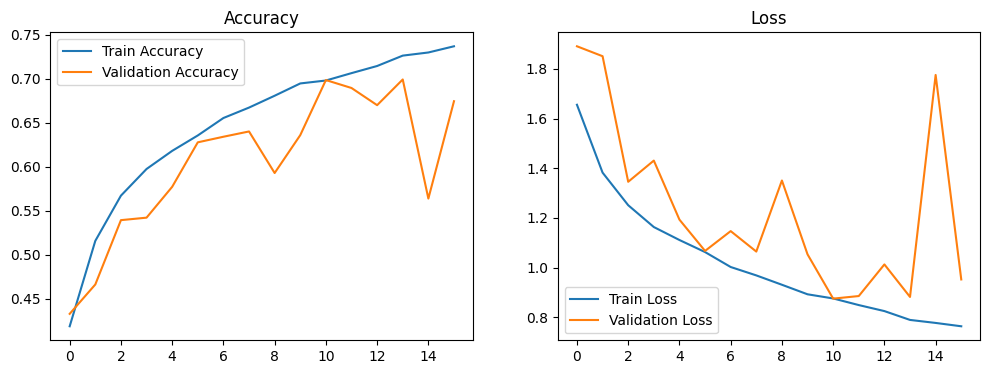

In [31]:
display_history(history_aug)

In [33]:
y_pred_aug = np.argmax(model_aug.predict(val_images_flat), axis=1)
acc_aug, prec_aug, rec_aug, f1_aug = display_metrics(val_labels, y_pred_aug)

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.6983333333333334
Precision: 0.7203202203419174
Recall: 0.6983333333333334
F1 score: 0.6925333750831156


In [13]:
df_compare_aug = pd.DataFrame({
    'Model': ['Best Model', 'With Augmented Data'],
    'Accuracy': [acc_18, acc_aug],
    'Precision': [prec_18, prec_aug],
    'Recall': [rec_18, rec_aug],
    'F1': [f1_18, f1_aug]
})
display(df_compare_aug)

,Model,Accuracy,Precision,Recall,F1
0,Best Model,0.768500,0.775368,0.768500,0.767238
1,With Augmented Data,0.698333,0.720320,0.698333,0.692533


# 6. Final Results

125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step
Classification Report
              precision    recall  f1-score   support

    airplane       0.79      0.82      0.80       380
  automobile       0.78      0.92      0.85       380
        bird       0.67      0.78      0.72       431
         cat       0.63      0.57      0.60       387
        deer       0.72      0.70      0.71       400
         dog       0.65      0.70      0.67       388
        frog       0.73      0.86      0.79       410
       horse       0.92      0.69      0.79       438
        ship       0.85      0.86      0.86       391
       truck       0.92      0.68      0.78       395

    accuracy                           0.76      4000
   macro avg       0.77      0.76      0.76      4000
weighted avg       0.77      0.76      0.76      4000



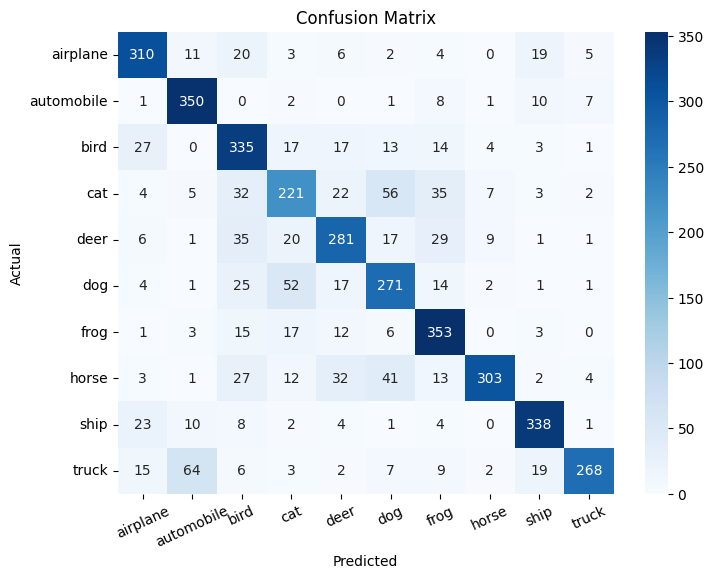

Accuracy: 0.7575
Precision: 0.767299247878092
Recall: 0.7575
F1 score: 0.75692338649004


In [17]:
best_model = resnet18

y_pred_test = np.argmax(best_model.predict(test_images), axis=1)
display_classification_report(test_labels, y_pred_test)
display_confusion_matrix(test_labels, y_pred_test)
acc_test, prec_test, rec_test, f1_test = display_metrics(test_labels, y_pred_test)

In [19]:
df_final_test = pd.DataFrame({
    'Model': ['ResNet18'],
    'Accuracy': [acc_test],
    'Precision': [prec_test],
    'Recall': [rec_test],
    'F1': [f1_test]
})
display(df_final_test)


,Model,Accuracy,Precision,Recall,F1
0,ResNet18,0.7575,0.767299,0.7575,0.756923
